In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

In [2]:
# Load the image (0-1 float)
color = plt.imread('img.jpg')

# Convert to uint8 for quantization
color_uint8 = (color * 255).astype(np.uint8)

# Generate grayscale from color
gray = np.mean(color_uint8, axis=-1).astype(np.uint8)

In [3]:
# Gray-level quantization
def gray_quantize(img, levels=8):
    step = 255 // (levels - 1)
    quantized = np.round(img / step) * step
    return quantized.astype(np.uint8)

In [4]:
# Color quantization using k-means
def color_quantize(img, k=8):
    pixels = img.reshape(-1, 3).astype(np.float32)
    centroids, _ = kmeans(pixels, k)
    labels, _ = vq(pixels, centroids)
    quantized = centroids[labels].reshape(img.shape).astype(np.uint8)
    return quantized

In [5]:
# Apply
gray_q = gray_quantize(gray, levels=4)
color_q = color_quantize(color_uint8, k=4)

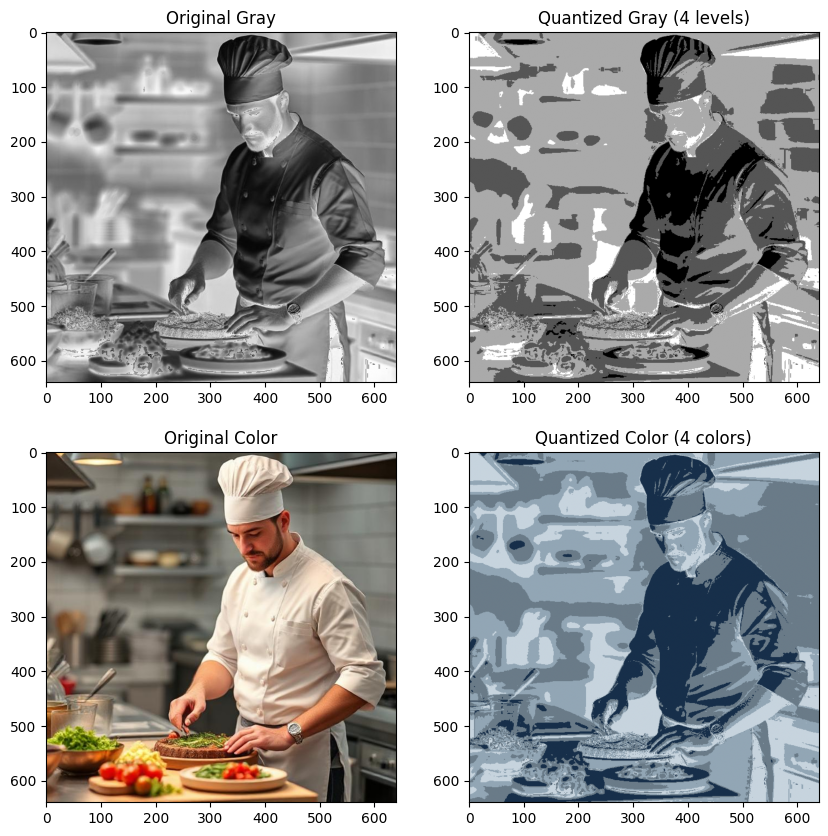

In [6]:
# Display
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(gray, cmap='gray')
axs[0,0].set_title('Original Gray')
axs[0,1].imshow(gray_q, cmap='gray')
axs[0,1].set_title('Quantized Gray (4 levels)')
axs[1,0].imshow(color)
axs[1,0].set_title('Original Color')
axs[1,1].imshow(color_q / 255.0)
axs[1,1].set_title('Quantized Color (4 colors)')
plt.show()